In [2]:
from google.colab import drive
drive.mount('/content/derive')

Mounted at /content/derive


In [3]:
import pandas as pd
import numpy as np
from matplotlib import Path 
import matplotlib.pyplot as plt

datafile=Path('SimData','/content/derive/MyDrive/data.xlsx')
df = pd.read_excel(datafile)
df.head()

,age,Ischemia,Diastolic function,E,A,Grade,E/A,e,a,e/a
0,32,POS,NL,1.31,0.58,0,2.258621,0.20,0.08,2.500000
1,35,POS,NL,0.92,0.51,0,1.803922,0.15,0.07,2.142857
2,41,POS,NL,0.84,0.61,0,1.377049,0.13,0.08,1.625000
3,33,POS,NL,1.04,0.45,0,2.311111,0.17,0.06,2.833333
4,30,POS,NL,1.11,0.49,0,2.265306,0.18,0.07,2.571429


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f057cab4290>]],
      dtype=object)

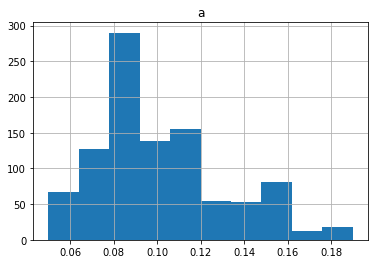

In [4]:
indexNames = df[ (df['a'] > 0.2)].index
df.drop(indexNames , inplace=True)
df.hist(column='a')

In [5]:
df['Ischemia'] = np.where(df['Ischemia']=='POS', 1, -1) #pos => 1 , neg => -1

w end =[[-2.91769031  4.82774142]]
b end =-1.8450000000000077


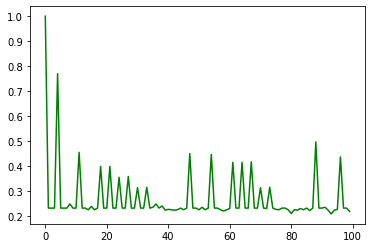

In [147]:
import numpy
from sklearn import preprocessing

for_train=df.sample(frac = 0.6) #60% train
train = for_train.iloc[:, 3:5]  # A,E columns #train

for_test = df.drop(train.index)  #40% reminder for test 
test = for_test.iloc[:, 3:5]   # A,E columns test #test

labels_train = for_train.iloc[:, 1:2]     #labels_train
Y = df.drop(labels_train.index)    #drop labels for train 
labels_test = Y.iloc[:, 1:2]     #labels_test

w=[]
w.append(0)
w.append(0)
w = np.array(w)
b=0

landa=1
#eta=0.01
eta=1e-3
c=15
MaxIter=100 #epochs
D= len(for_train) #Number of training samples
ce = np.zeros((MaxIter,))
eter = np.zeros((MaxIter,))
for m in range(MaxIter):
  G =[]
  G.append(0)
  G.append(0)
  G = np.array(G)
  g=0
  counter=0
  for d in range(D): # D number of samples
    t1=np.array(train.iloc[d:d+1,:]) #sample train row d
    w1=np.transpose(w)
    q=np.dot(t1,w1)  #x.w
    z=q+b  #(w.x+b)
    y=labels_train.iloc[d:d+1,:]
    Y=np.array(y).item()
    h=Y*z  #y*(w.x+b)
    if h<= 0:
      counter=counter+1
    if h < 1:  #y*(w.x+b)<1  
      
      G=G.reshape(1, 2)
      G=G+(Y*t1)*c
      g=g+Y*c
    #end if
  #end for 2

  #show iteration error
  #plot in iter
  CE=0
  CE=counter/D   #classification error
  ce[m]=np.array(CE).item()
  eter[m]=np.array(m).item()
  #shuffle 
  G=G-landa*w
  w=w+eta*G
  b=b+eta*g  
  df_shuffle=for_train.sample(frac =1)  #shuffle train
  train = df_shuffle.iloc[:, 3:5]  # A,E columns train #train
  labels_train = df_shuffle.iloc[:, 1:2]    #labels for train  
#end for 1
plt.plot(eter, ce, 'g')
w=w.reshape((1, 2))

print("w end ={}".format(w) )
print("b end ={}".format(b) )


In [149]:
D= len(train) #Number of training samples

#empirical error
count=0
for d in range(D):
    t1=np.array(train.iloc[d:d+1,:]) #sample train row d
    w=w.reshape((2,1))
    q=np.dot(t1,w)  #w.x
    z=q+b  #(w.x+b)
    y=labels_train.iloc[d:d+1,:]
    Y=np.array(y).item() # label y
    j=Y*z
    if j <= 0:
      count=count+1

CE_one=0
CE_one=count/D  #empirical error for train data
print("empirical error for train data ={}".format(CE_one) )

D_two= len(test) #Number of training samples
#empirical error
count_two=0
for d in range(D_two):
    t2=np.array(test.iloc[d:d+1,:]) #sample test row d
    w=w.reshape((2,1))
    q=np.dot(t2,w)  #w.x
    z=q+b  #(w.x+b)
    y=labels_test.iloc[d:d+1,:]
    Y=np.array(y).item() # label y
    j=Y*z
    if j <= 0:
      count_two=count_two+1

CE_two=0
CE_two=count_two/D_two   #empirical error for test data
print("empirical error for test data ={}".format(CE_two) )

empirical error for train data =0.22203672787979967
empirical error for test data =0.24060150375939848


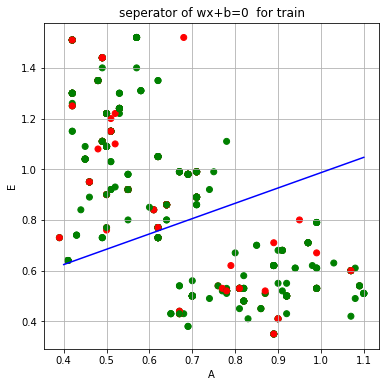

In [148]:
fig, ax = plt.subplots(figsize=(6,6))
arr1 = np.array(for_train.iloc[:, 4:5]) # A column
arr2 = np.array(for_train.iloc[:, 3:4]) # E column
labl = np.array(labels_train.iloc[:,0:1]) # label train
color= ['red' if l == 1 else 'green' for l in labl]

ax.scatter(arr1, arr2, color=color)

#y = (-(b / w2) / (b / w1))x + (-b / w2)
x = np.linspace(0.4,1.1,25)
w=w.reshape(1,2)
s1=np.array(w[:,0:1]).item()  #column 1 of w
s2=np.array(w[:,1:2]).item()  #column 2 of w
y = (-(b / s2) / (b / s1))*x + (-b / s2)
ax.plot(x, y, '-b', label='wx+b=0')

ax.set_xlabel('A')
ax.set_ylabel('E')
plt.title('seperator of wx+b=0  for train')

ax.grid()
plt.show()

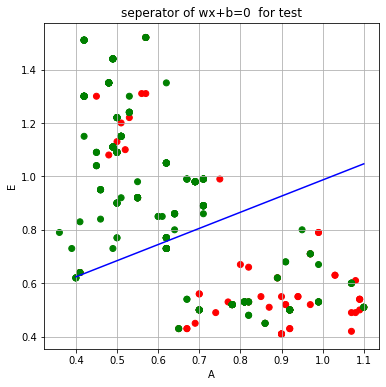

In [150]:
fig, ax = plt.subplots(figsize=(6,6))
arr1 = np.array(for_test.iloc[:, 4:5]) # A column
arr2 = np.array(for_test.iloc[:, 3:4]) # E column
labl = np.array(labels_test.iloc[:,0:1]) # label train
color= ['red' if l == 1 else 'green' for l in labl]
ax.scatter(arr1, arr2, color=color)

#y = (-(b / w2) / (b / w1))x + (-b / w2)
x = np.linspace(0.4,1.1,25)
w=w.reshape(1,2)
s1=np.array(w[:,0:1]).item()  #column 1 of w
s2=np.array(w[:,1:2]).item()  #column 2 of w
y = (-(b / s2) / (b / s1))*x + (-b / s2)
ax.plot(x, y, '-b', label='wx+b=0')

ax.set_xlabel('A')
ax.set_ylabel('E')
plt.title('seperator of wx+b=0  for test')

ax.grid()
plt.show()

In [151]:
tedad= len(test) #Number of test samples
#empirical error
tp=0
tppf=0
tpfn=0
f=0
pricision=0
recall=0

for tt in range(tedad):
    ta=np.array(test.iloc[tt:tt+1,:]) #sample test row tt
    w=w.reshape((2,1))
    q=np.dot(ta,w)  #w.x
    z=q+b  #(w.x+b)
    y=labels_test.iloc[tt:tt+1,:]
    Y=np.array(y).item() # label y
    if (Y == 1 and z > 0) :
      tp = tp+1
    if z > 0: #tp+fp
      tppf = tppf+1
    if Y == 1: #tp+fn
      tpfn = tpfn+1
#end for      
pricision = tp/tppf #pricision
recall = tp/tpfn  #recall

f = 2*pricision*recall/(pricision+recall) #f score
print(" pricision ={}".format(pricision) )
print("recall ={}".format(recall) )
print("f score pricision recall ={}".format(f) )

 pricision =0.46153846153846156
recall =0.6976744186046512
f score pricision recall =0.5555555555555556


for_train=df.sample(frac = 0.6) #60% train
train = for_train.iloc[:, 3:5]  # A,E columns #train

for_test = df.drop(train.index)  #40% reminder for test 
test = for_test.iloc[:, 3:5]   # A,E columns test #test

labels_train = for_train.iloc[:, 1:2]     #labels_train
Y = df.drop(labels_train.index)    #drop labels for train 
labels_test = Y.iloc[:, 1:2]     #labels_test


w end =[[-1.17219357  5.58896485]]
b end =-3.000000000000035


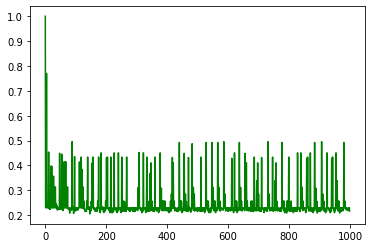

In [152]:
import numpy
from sklearn import preprocessing

w=[]
w.append(0)
w.append(0)
w = np.array(w)
b=0

landa=1
#eta=0.01
eta=1e-3
c=15
MaxIter=1000 #epochs
D= len(for_train) #Number of training samples
ce = np.zeros((MaxIter,))
eter = np.zeros((MaxIter,))
for m in range(MaxIter):
  G =[]
  G.append(0)
  G.append(0)
  G = np.array(G)
  g=0
  counter=0
  for d in range(D): # D number of samples
    t1=np.array(train.iloc[d:d+1,:]) #sample train row d
    w1=np.transpose(w)
    q=np.dot(t1,w1)  #x.w
    z=q+b  #(w.x+b)
    y=labels_train.iloc[d:d+1,:]
    Y=np.array(y).item()
    h=Y*z  #y*(w.x+b)
    if h <= 0:
      counter=counter+1
    if h <= 1:
      #counter=counter+1
      G=G.reshape((1, 2))
      G=G+(Y*t1)*c
      g=g+Y*c
    #end if
  #end for 2

  #show iteration error
  #plot in iter
  CE=0
  CE=counter/D   #classification error
  ce[m]=np.array(CE).item()
  eter[m]=np.array(m).item()
  #shuffle 
  G=G-landa*w
  w=w+eta*G
  b=b+eta*g   
  df_shuffle=for_train.sample(frac =1)  #shuffle train
  train = df_shuffle.iloc[:, 3:5]  # A,E columns train #train
  labels_train = df_shuffle.iloc[:, 1:2]    #labels for train  
#end for 1
plt.plot(eter, ce, 'g')
w=w.reshape((1, 2))

print("w end ={}".format(w) )
print("b end ={}".format(b) )


In [153]:
D= len(train) #Number of training samples

#empirical error
count=0
for d in range(D):
    t1=np.array(train.iloc[d:d+1,:]) #sample train row d
    w=w.reshape((2,1))
    q=np.dot(t1,w)  #w.x
    z=q+b  #(w.x+b)
    y=labels_train.iloc[d:d+1,:]
    Y=np.array(y).item() # label y
    j=Y*z
    if j <= 0:
      count=count+1

CE_one=0
CE_one=count/D  #empirical error for train data
print("empirical error for train data ={}".format(CE_one) )

D_two= len(test) #Number of training samples
#empirical error
count_two=0
for d in range(D_two):
    t2=np.array(test.iloc[d:d+1,:]) #sample test row d
    w=w.reshape((2,1))
    q=np.dot(t2,w)  #w.x
    z=q+b  #(w.x+b)
    y=labels_test.iloc[d:d+1,:]
    Y=np.array(y).item() # label y
    j=Y*z
    if j <= 0:
      count_two=count_two+1

CE_two=0
CE_two=count_two/D_two   #empirical error for test data
print("empirical error for test data ={}".format(CE_two) )

empirical error for train data =0.22537562604340566
empirical error for test data =0.23809523809523808


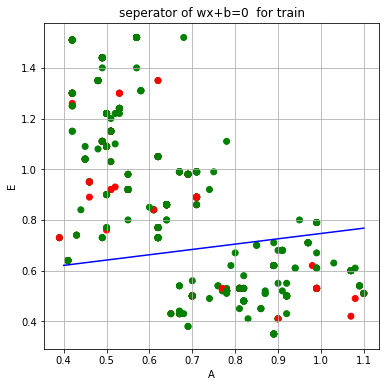

In [154]:
fig, ax = plt.subplots(figsize=(6,6))
arr1 = np.array(for_train.iloc[:, 4:5]) # A column
arr2 = np.array(for_train.iloc[:, 3:4]) # E column
labl = np.array(labels_train.iloc[:,0:1]) # label train
color= ['red' if l == 1 else 'green' for l in labl]
ax.scatter(arr1, arr2, color=color)

#y = (-(b / w2) / (b / w1))x + (-b / w2)
x = np.linspace(0.4,1.1,25)
w=w.reshape(1,2)
s1=np.array(w[:,0:1]).item()  #column 1 of w
s2=np.array(w[:,1:2]).item()  #column 2 of w
y = (-(b / s2) / (b / s1))*x + (-b / s2)
ax.plot(x, y, '-b', label='wx+b=0')

ax.set_xlabel('A')
ax.set_ylabel('E')
plt.title('seperator of wx+b=0  for train')

ax.grid()
plt.show()

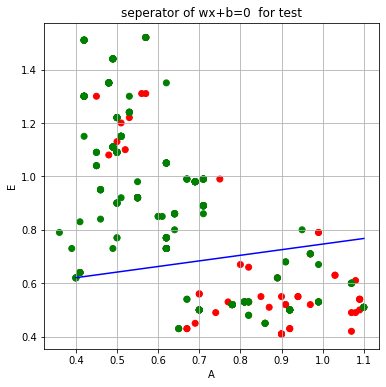

In [155]:
fig, ax = plt.subplots(figsize=(6,6))
arr1 = np.array(for_test.iloc[:, 4:5]) # A column
arr2 = np.array(for_test.iloc[:, 3:4]) # E column
labl = np.array(labels_test.iloc[:,0:1]) # label train
color= ['red' if l == 1 else 'green' for l in labl]
ax.scatter(arr1, arr2, color=color)

#y = (-(b / w2) / (b / w1))x + (-b / w2)
x = np.linspace(0.4,1.1,25)
w=w.reshape(1,2)
s1=np.array(w[:,0:1]).item()  #column 1 of w
s2=np.array(w[:,1:2]).item()  #column 2 of w
y = (-(b / s2) / (b / s1))*x + (-b / s2)
ax.plot(x, y, '-b', label='wx+b=0')

ax.set_xlabel('A')
ax.set_ylabel('E')
plt.title('seperator of wx+b=0  for test')

ax.grid()
plt.show()

In [133]:
tedad= len(test) #Number of test samples
#empirical error
tp=0
tppf=0
tpfn=0
f=0
pricision=0
recall=0
for tt in range(tedad):
    ta=np.array(test.iloc[tt:tt+1,:]) #sample test row tt
    w=w.reshape((2,1))
    q=np.dot(ta,w)  #w.x
    z=q+b  #(w.x+b)
    y=labels_test.iloc[tt:tt+1,:]
    Y=np.array(y).item() # label y
    if (Y == 1 and z > 0) :
      tp = tp+1
    if z > 0: #tp+fp
      tppf = tppf+1
    if Y == 1: #tp+fn
      tpfn = tpfn+1
#end for      
pricision = tp/tppf #pricision
recall = tp/tpfn  #recall

f = 2*pricision*recall/(pricision+recall) #f score
print(" pricision ={}".format(pricision) )
print("recall ={}".format(recall) )
print("f score pricision recall ={}".format(f) )

 pricision =0.8181818181818182
recall =0.0967741935483871
f score pricision recall =0.17307692307692307


w end =[[-2.94536465  4.49673464 -1.02393447 -1.85964574]]
b end =-0.8400000000000052


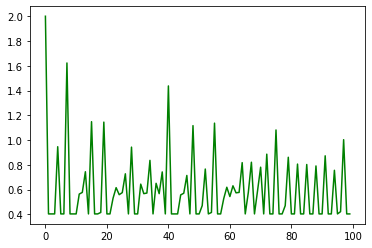

In [9]:
import numpy
from sklearn import preprocessing

for_train_before = df.drop(df.columns[[5,6]], axis=1)
for_train=for_train_before.sample(frac = 0.6) #60% train 
for_train['index'] = for_train.index
train = for_train.iloc[:, 3:7]  # E,A,e,a columns #train

for_test = df.drop(train.index)  #40% reminder for test 
test = for_test.iloc[:, 3:7]   # E,A,e,a columns test #test

labels_train = for_train.iloc[:, 1:2]     #labels_train
Y = df.drop(labels_train.index)    #drop labels for train 
labels_test = Y.iloc[:, 1:2]     #labels_test


w=[]
w.append(0)
w.append(0)
w.append(0)
w.append(0)
w = np.array(w)
b=0

landa=1
#eta=0.01
eta=1e-3
c=15
MaxIter=100 #epochs
D= len(for_train) #Number of training samples
ce = np.zeros((MaxIter,))
eter = np.zeros((MaxIter,))
for m in range(MaxIter):
  G =[]
  G.append(0)
  G.append(0)
  G.append(0)
  G.append(0)
  G = np.array(G)
  g=0
  counter=0
  for d in range(D): # D number of samples
    t1=np.array(train.iloc[d:d+1,:]) #sample train row d
    w1=np.transpose(w)
    q=np.dot(t1,w1)  #x.w
    z=q+b  #(w.x+b)
    y=labels_train.iloc[d:d+1,:]
    Y=np.array(y).item()
    h=Y*z  #y*(w.x+b)
    if h <= 0:
      counter=counter+1
    if h < 1:
      counter=counter+1
      G=G.reshape((1, 4))
      G=G+(Y*t1)*c
      g=g+Y*c
    #end if
  #end for 2

  #show iteration error
  #plot in iter
  CE=0
  CE=counter/D   #classification error
  ce[m]=np.array(CE).item()
  eter[m]=np.array(m).item()
 
  G=G-landa*w
  w=w+eta*G
  b=b+eta*g

  #shuffle           
  df_shuffle=for_train.sample(frac =1)  #shuffle train
  train = df_shuffle.iloc[:, 3:7]  # A,E columns train #train
  labels_train = df_shuffle.iloc[:, 1:2]    #labels for train  
#end for 1
plt.plot(eter, ce, 'g')
w=w.reshape((1, 4))

print("w end ={}".format(w) )
print("b end ={}".format(b) )


In [10]:
D= len(train) #Number of training samples

#empirical error
count=0
for d in range(D):
    t1=np.array(train.iloc[d:d+1,:]) #sample train row d
    w=w.reshape((4,1))
    q=np.dot(t1,w)  #w.x
    z=q+b  #(w.x+b)
    y=labels_train.iloc[d:d+1,:]
    Y=np.array(y).item() # label y
    j=Y*z
    if j <= 0:
      count=count+1

CE_one=0
CE_one=count/D  #empirical error for train data
print("empirical error for train data ={}".format(CE_one) )

D_two= len(test) #Number of training samples
#empirical error
count_two=0
for d in range(D_two):
    t2=np.array(test.iloc[d:d+1,:]) #sample test row d
    w=w.reshape((4,1))
    q=np.dot(t2,w)  #w.x
    z=q+b  #(w.x+b)
    y=labels_test.iloc[d:d+1,:]
    Y=np.array(y).item() # label y
    j=Y*z #y*(w.x+b)
    if j <= 0:
      count_two=count_two+1

CE_two=0
CE_two=count_two/D_two   #empirical error for test data
print("empirical error for test data ={}".format(CE_two) )

empirical error for train data =0.2337228714524207
empirical error for test data =0.22305764411027568


w end =[[ -4.2020349    5.24047834  -4.28367382 -14.04989263]]
b end =-5.520000000000039


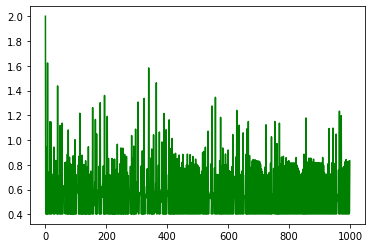

In [11]:
import numpy
from sklearn import preprocessing

w=[]
w.append(0)
w.append(0)
w.append(0)
w.append(0)
w = np.array(w)
b=0

landa=1
#eta=0.01
eta=1e-3
c=15
MaxIter=1000 #epochs
D= len(for_train) #Number of training samples
ce = np.zeros((MaxIter,))
eter = np.zeros((MaxIter,))
for m in range(MaxIter):
  G =[]
  G.append(0)
  G.append(0)
  G.append(0)
  G.append(0)
  G = np.array(G)
  g=0
  counter=0
  for d in range(D): # D number of samples
    t1=np.array(train.iloc[d:d+1,:]) #sample train row d
    w1=np.transpose(w)
    q=np.dot(t1,w1)  #x.w
    z=q+b  #(w.x+b)
    y=labels_train.iloc[d:d+1,:]
    Y=np.array(y).item()
    h=Y*z  #y*(w.x+b)
    if h <= 0:
      counter=counter+1
    if h < 1:
      counter=counter+1
      G=G.reshape((1, 4))
      G=G+(Y*t1)*c
      g=g+Y*c
    #end if
  #end for 2

  #show iteration error
  #plot in iter
  CE=0
  CE=counter/D   #classification error
  ce[m]=np.array(CE).item()
  eter[m]=np.array(m).item()
 
  G=G-landa*w
  w=w+eta*G
  b=b+eta*g

  #shuffle           
  df_shuffle=for_train.sample(frac =1)  #shuffle train
  train = df_shuffle.iloc[:, 3:7]  # A,E columns train #train
  labels_train = df_shuffle.iloc[:, 1:2]    #labels for train  
#end for 1
plt.plot(eter, ce, 'g')
w=w.reshape((1, 4))

print("w end ={}".format(w) )
print("b end ={}".format(b) )


In [15]:
D= len(train) #Number of training samples

#empirical error
count=0
for d in range(D):
    t1=np.array(train.iloc[d:d+1,:]) #sample train row d
    w=w.reshape((4,1))
    q=np.dot(t1,w)  #w.x
    z=q+b  #(w.x+b)
    y=labels_train.iloc[d:d+1,:]
    Y=np.array(y).item() # label y
    j=Y*z
    if j <= 0:
      count=count+1

CE_one=0
CE_one=count/D  #empirical error for train data
print("empirical error for train data ={}".format(CE_one) )

D_two= len(test) #Number of training samples
#empirical error
count_two=0
for d in range(D_two):
    t2=np.array(test.iloc[d:d+1,:]) #sample test row d
    w=w.reshape((4,1))
    q=np.dot(t2,w)  #w.x
    z=q+b  #(w.x+b)
    y=labels_test.iloc[d:d+1,:]
    Y=np.array(y).item() # label y
    j=Y*z
    if j <= 0:
      count_two=count_two+1

CE_two=0
CE_two=count_two/D_two   #empirical error for test data
print("empirical error for test data ={}".format(CE_two) )

empirical error for train data =0.2020033388981636
empirical error for test data =0.2581453634085213
